# Loading Data

The dataset which we are using is consists of Single Hop and Multi Hop wireless sensor.
The data consists of humidity and temperature measurements.

In [64]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [57]:
df1=pd.read_excel("conv.xlsx")

In [60]:
df1.head()

,Reading#,Mote-ID,Humidity,Tepmrature,Label
0,1,1,45.93,27.97,0
1,2,1,45.90,27.95,0
2,3,1,45.90,27.96,0
3,4,1,45.93,27.95,0
4,5,1,45.93,27.97,0


In [61]:
df1.describe()

,Reading#,Mote-ID,Humidity,Tepmrature,Label
count,4417.000000,4417.0,4417.000000,4417.000000,4417.000000
mean,2209.000000,1.0,44.470469,27.871007,0.026489
std,1275.222399,0.0,4.389466,1.148257,0.160601
min,1.000000,1.0,41.710000,26.270000,0.000000
25%,1105.000000,1.0,42.790000,27.260000,0.000000
50%,2209.000000,1.0,43.980000,27.850000,0.000000
75%,3313.000000,1.0,44.880000,28.200000,0.000000
max,4417.000000,1.0,91.610000,56.560000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Reading#    4417 non-null   int64  
 1   Mote-ID     4417 non-null   int64  
 2   Humidity    4417 non-null   float64
 3   Tepmrature  4417 non-null   float64
 4   Label       4417 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 172.7 KB


In [63]:
pp.ProfileReport(df1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

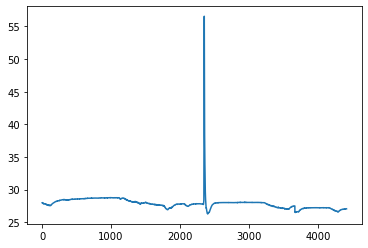

In [59]:
import matplotlib.pyplot as plt
plt.plot(df1['Tepmrature'])

In [9]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic", # the more negative, the more stationary
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
adf_test(df1['Tepmrature'])

Results of Dickey-Fuller Test:
Test Statistic                -7.234793e+00
p-value                        1.952247e-10
#Lags Used                     3.000000e+01
Number of Observations Used    4.386000e+03
Critical Value (1%)           -3.431842e+00
Critical Value (5%)           -2.862199e+00
Critical Value (10%)          -2.567121e+00
dtype: float64


In [10]:
adfuller(df1['Tepmrature'])

(-7.234792727804538,
 1.9522474492284283e-10,
 30,
 4386,
 {'1%': -3.43184182200332,
  '5%': -2.8621992036994266,
  '10%': -2.5671208984147005},
 -5022.627796602184)

In [11]:
series=df1['Tepmrature'].tolist()

In [12]:
def diff(series):
    for i in range(len(series)-1,0,-1):
        series[i]=series[i]-series[i-1]
    return series
first_order =diff(series)
first_order

[27.97,
 -0.019999999999999574,
 0.010000000000001563,
 -0.010000000000001563,
 0.019999999999999574,
 0.010000000000001563,
 -0.030000000000001137,
 -0.00999999999999801,
 -0.019999999999999574,
 0.0,
 -0.020000000000003126,
 -0.00999999999999801,
 -0.010000000000001563,
 0.0,
 -0.00999999999999801,
 0.0,
 -0.019999999999999574,
 0.00999999999999801,
 0.0,
 -0.019999999999999574,
 0.030000000000001137,
 0.0,
 -0.019999999999999574,
 0.00999999999999801,
 -0.00999999999999801,
 -0.010000000000001563,
 -0.019999999999999574,
 0.0,
 0.00999999999999801,
 0.010000000000001563,
 -0.010000000000001563,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.00999999999999801,
 -0.010000000000001563,
 -0.00999999999999801,
 0.019999999999999574,
 0.0,
 -0.019999999999999574,
 0.00999999999999801,
 -0.029999999999997584,
 0.0,
 0.029999999999997584,
 -0.00999999999999801,
 0.00999999999999801,
 -0.00999999999999801,
 -0.010000000000001563,
 -0.019999999999999574,
 -0.00999999999999801,
 0.0,
 0.0,
 0.0,
 -0.

In [13]:
df1['1orderdiff']=first_order
df1

,Reading#,Mote-ID,Humidity,Tepmrature,Label,1orderdiff
0,1,1,45.93,27.97,0,27.97
1,2,1,45.90,27.95,0,-0.02
2,3,1,45.90,27.96,0,0.01
3,4,1,45.93,27.95,0,-0.01
4,5,1,45.93,27.97,0,0.02
...,...,...,...,...,...,...
4412,4413,1,42.62,27.04,0,0.01
4413,4414,1,42.62,27.04,0,0.00
4414,4415,1,42.62,27.05,0,0.01
4415,4416,1,42.62,27.05,0,0.00


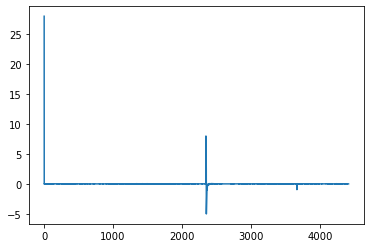

In [14]:
plt.plot(df1['1orderdiff'])

In [41]:
xdata = df1['Humidity']
ydata = df1['Tepmrature']
zdata = df1['Reading#']


In [17]:
df_anomaly_reference = pd.DataFrame(columns=df1.columns)


In [48]:
MAX_HUMIDITY = 50
MIN_HUMIDITY = 45
MAX_TEMP = 45
MIN_TEMP = 25

In [49]:
for i in range(len(df1)):
        
    if  df1.loc[i, 'Humidity'] > MAX_HUMIDITY or df1.loc[i, 'Humidity'] < MAX_HUMIDITY or df1.loc[i, 'Tepmrature'] > MAX_TEMP or df1.loc[i, 'Tepmrature'] < MIN_TEMP:
        df_anomaly_reference = df_anomaly_reference.append(df1.loc[i])

print("The number of anomalies reference is: " + str(len(df_anomaly_reference)))

The number of anomalies reference is: 22085


# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

This is an clustering algorithm. It clusters all the points so that we can identify outliers points

<AxesSubplot:xlabel='Humidity', ylabel='Tepmrature'>

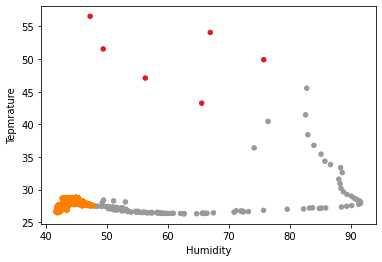

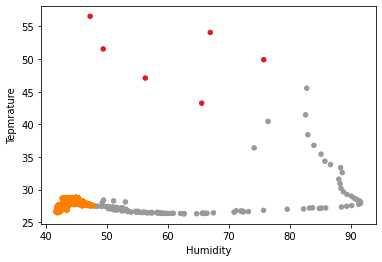

In [69]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
detecting_outliers = DBSCAN(eps = .2, metric="euclidean", min_samples = 5, n_jobs = -1)
num2 = scaler.fit_transform(df1)
num2 = pd.DataFrame(num2, columns = df1.columns)
clusters = detecting_outliers.fit_predict(num2)

from matplotlib import cm
cmap = cm.get_cmap('Set1')
df1.plot.scatter(x='Humidity',y='Tepmrature', c=clusters, cmap=cmap, colorbar = False)

from matplotlib import cm
cmap = cm.get_cmap('Set1')
df1.plot.scatter(x='Humidity',y='Tepmrature', c=clusters, cmap=cmap, colorbar = False)

DBSCAN  | True Negative = 0
DBSCAN  | False Positive = 0


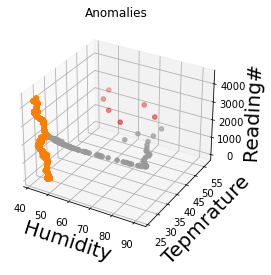

In [72]:
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=clusters, cmap=cmap)
ax.set_xlabel('Humidity',fontsize=20)
ax.set_ylabel('Tepmrature',fontsize=20)
ax.set_zlabel('Reading#',fontsize=20)
plt.title('Anomalies')

correct_pred = 0
wrong_pred = 0

for i in range(len(clusters)):
    if clusters[i] == -1 and i in df_anomaly_reference.index:
        true_predicted += 1
    if clusters[i] == -1 and i not in df_anomaly_reference.index:
        mistakes += 1

print("DBSCAN  | True Negative = " + str(correct_pred))
print("DBSCAN  | False Positive = " + str(wrong_pred))

# Isolation Forests

It's an unsupervised learning method, where it tries to isolate anomalies rather than just profiling normal points.


/Users/dhruvpanchal/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forests | True Negative = 43
Isolation Forests | False Positive = 0


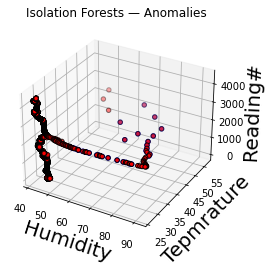

In [68]:
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.01) 
clf.fit(df1)
if_scores = clf.decision_function(df1)
if_anomalies=clf.predict(df1)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=df1[if_anomalies==1]


ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c='red',s=20,edgecolor='k')
ax.scatter3D(if_anomalies['Humidity'], if_anomalies['Tepmrature'],if_anomalies['Reading#'], c='blue')
ax.set_xlabel('Humidity',fontsize=20)
ax.set_ylabel('Tepmrature',fontsize=20)
ax.set_zlabel('Reading#',fontsize=20)

plt.title('Isolation Forests — Anomalies')

correct_pred = 0
wrong_pred = 0

# Get True Negative and False Positive 
for i in range(len(clusters)):
    if i in if_anomalies.index and i in df_anomaly_reference.index:
        true_predicted += 1
    if i in if_anomalies.index and i not in df_anomaly_reference.index:
        mistakes += 1

print("Isolation Forests | True Negative = " + str(correct_pred))
print("Isolation Forests | False Positive = " + str(wrong_pred))

# One-Class SVM

One-class Support Vector Machine is an unsupervised algorithm that learns a decision function for 
novelty detection: classifying new data as similar or different to the training set.

One-Class Support Vector Machines | True Negative = 1367
One-Class Support Vector Machines | False Positive = 0


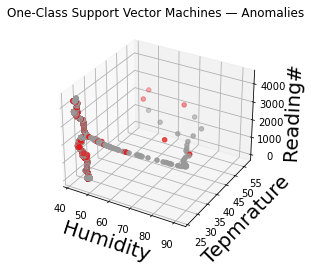

In [53]:
from sklearn import svm
clf=svm.OneClassSVM(nu=.02,kernel='rbf',gamma=.005)
clf.fit(df1)
y_pred=clf.predict(df1)

ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=y_pred, cmap=cmap)
ax.set_xlabel('Humidity',fontsize=20)
ax.set_ylabel('Tepmrature',fontsize=20)
ax.set_zlabel('Reading#',fontsize=20)

plt.title('One-Class Support Vector Machines — Anomalies')

correct_pred = 0
wrong_pred = 0

# Get True Negative and False Positive 
for i in range(len(clusters)):
    if y_pred[i] == -1 and i in df_anomaly_reference.index:
        true_predicted += 1
    if y_pred[i] == -1 and i not in df_anomaly_reference.index:
        mistakes += 1

print("One-Class Support Vector Machines | True Negative = " + str(correct_pred))
print("One-Class Support Vector Machines | False Positive = " + str(wrong_pred))